In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Read the Dataset
df = pd.read_csv('HR_comma_sep.csv')
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

### EDA

In [4]:
# shape of dataframe
df.shape

(14999, 10)

In [5]:
# info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# chk for null values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
# chk for duplicates
df[df.duplicated()]

satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
396                     139                   3              0     1   
866                     128                   3              0     1   
1317                    127                   3              0     1   
1368                    132                   3              0     1   
1461                    142                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years       sales  salary  
396                        0       sales     low  
866                        0  accounting     low  
1317                       0       sales  medium  
1368                       0       RandD     low  
1461                       0       sales     low  
...                      ...         ...     ...  
14994                      0     support     low  
14995                      0     support     low  
14996                      0     support     low  
14997                      0     support     low  
14998                      0     support     low  

[3008 rows x 10 columns]

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [10]:
# Stats of the dataset
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        11991.000000     11991.000000    11991.000000   
mean             0.629658         0.716683        3.802852   
std              0.241070         0.168343        1.163238   
min              0.090000         0.360000        2.000000   
25%              0.480000         0.570000        3.000000   
50%              0.660000         0.720000        4.000000   
75%              0.820000         0.860000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          11991.000000        11991.000000   11991.000000  11991.000000   
mean             200.473522            3.364857       0.154282      0.166041   
std               48.727813            1.330240       0.361234      0.372133   
min               96.000000            2.000000       0.000000      0.000000   
25%              157.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              243.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           11991.000000  
mean                0.016929  
std                 0.129012  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [13]:
# Seperate the categorical columns and check for unique values and its value counts
categorical = [var for var in df.columns if df[var].dtype == 'O']
print(categorical)

['sales', 'salary']


In [14]:
# Seperate the numerical columns
numerical = [var for var in df.columns if df[var].dtype != 'O']
print(numerical)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']


In [17]:
# check for unique values for the categorical columns...
for var in categorical:
    print('column ::',  df[var].value_counts() )
    print('='*40)

column :: sales
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64
column :: salary
low       5740
medium    5261
high       990
Name: count, dtype: int64


In [18]:
# change the name of column from sales to department
df = df.rename(columns= {'sales' : 'department'})
df.head(2)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   

   salary  
0     low  
1  medium

In [ ]:
# change the category from support => technical & IT => technical
# total value counts for technical should show as 2244 + 1821 + 976 = 5041

In [19]:
# Option 1:
df.loc[df['department'] == 'IT', 'department'] = 'technical'
df.loc[df['department'] == 'support', 'department'] = 'technical'

In [ ]:
# Option 2:
# df['department'] = df['department'].replace({ 'support' : 'technical', 'IT' : 'technical'})

In [ ]:
# Option 3:
# df['department'] = np.where(df['department'] == 'support', 'technical', df['department'])
# df['department'] = np.where(df['department'] == 'IT', 'technical', df['department'])

In [20]:
df['department'].value_counts()

department
technical      5041
sales          3239
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

### Visualization

In [ ]:
# Create a scatterplot for those employees that have left the company on the basis of :
# last_evaluation
# satisfaction level
# number of projects
# list your findings

In [21]:
df_left = df[ df['left'] == 1]
df_left.head(2)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   

   salary  
0     low  
1  medium

<Axes: xlabel='last_evaluation', ylabel='satisfaction_level'>

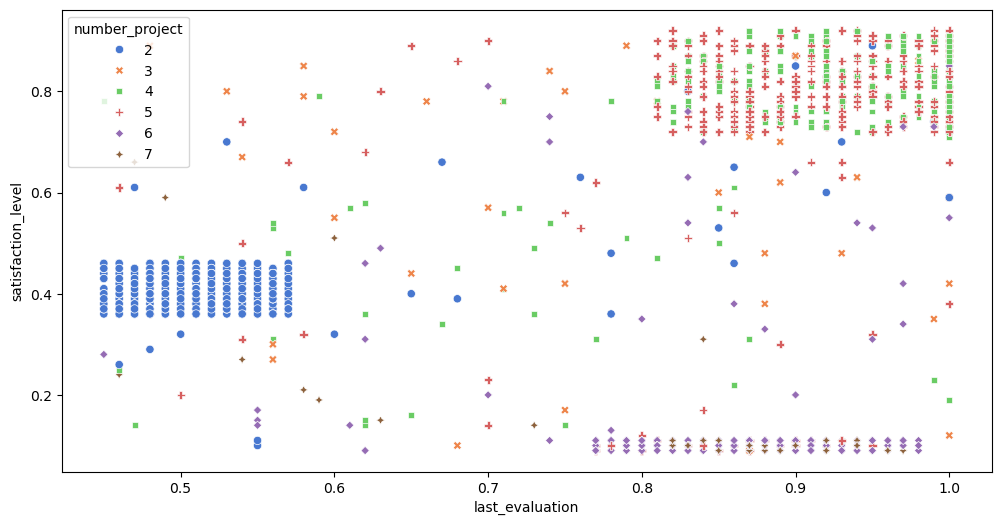

In [22]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data = df_left, x = 'last_evaluation', y = 'satisfaction_level', 
               style = 'number_project', hue = 'number_project', palette='muted')

In [ ]:
# Employees with number of projects > 4 have left the company even if the satisfaction level was high

<Axes: xlabel='last_evaluation', ylabel='satisfaction_level'>

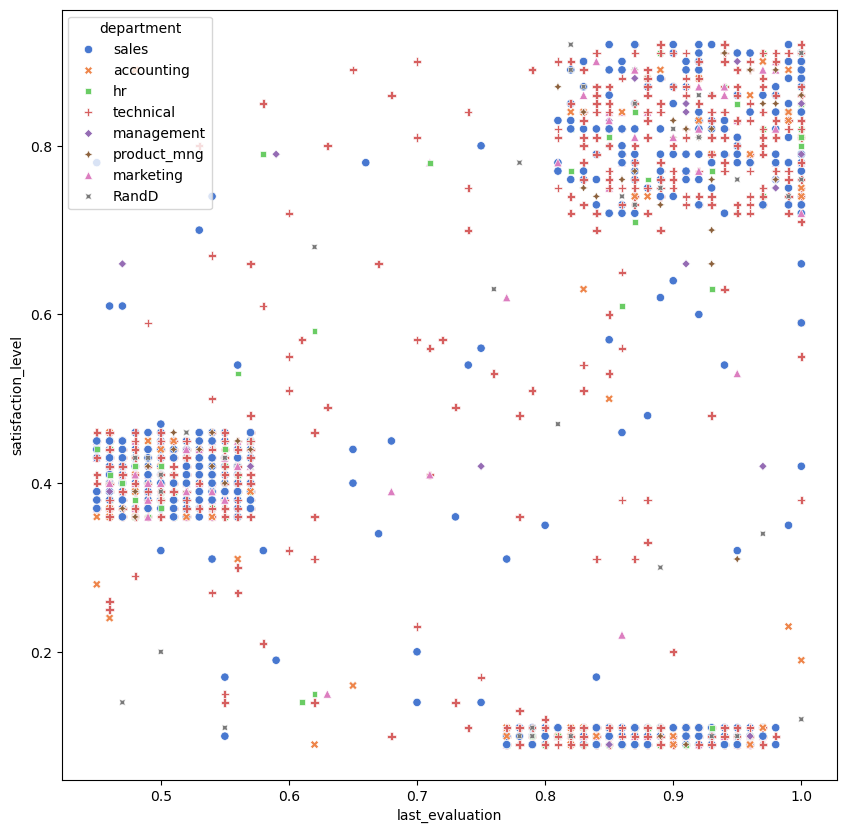

In [27]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = df_left, x = 'last_evaluation', y = 'satisfaction_level', 
               style = 'department', hue = 'department', palette='muted')

In [ ]:
# Employees from department Sales and IT have left the company most

<Axes: xlabel='department', ylabel='count'>

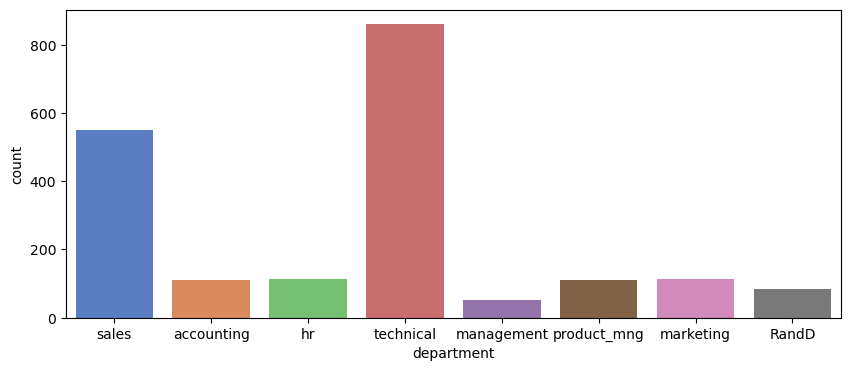

In [31]:
plt.figure(figsize=(10, 4))
sns.countplot(data = df_left, x = 'department', hue = 'department', palette='muted')

In [ ]:
# Analyse average_monthly_hours, time_spend_company, promotion_last_5years

<Axes: xlabel='average_montly_hours', ylabel='satisfaction_level'>

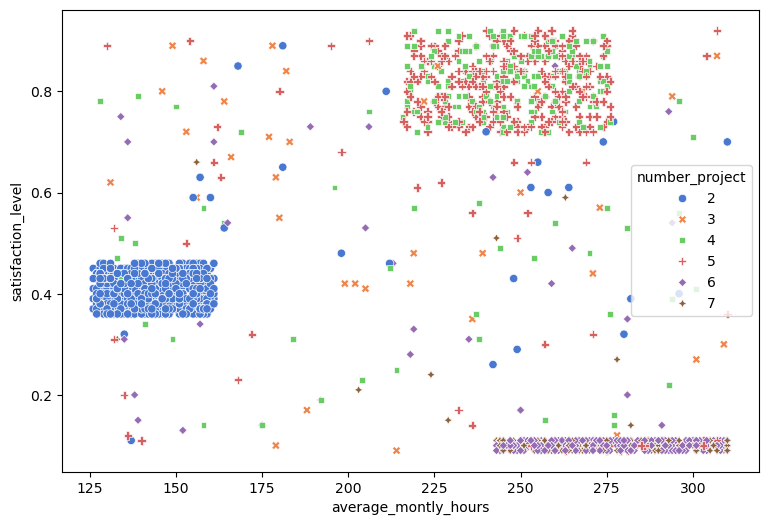

In [37]:
plt.figure(figsize=(9, 6))
sns.scatterplot(data = df_left, x = 'average_montly_hours', y = 'satisfaction_level', 
               style = 'number_project', hue = 'number_project', palette='muted')

In [ ]:
# Employees whose monthly hrs were more than 220 and number of projects were more than 3
# have left the company

<Axes: xlabel='average_montly_hours', ylabel='last_evaluation'>

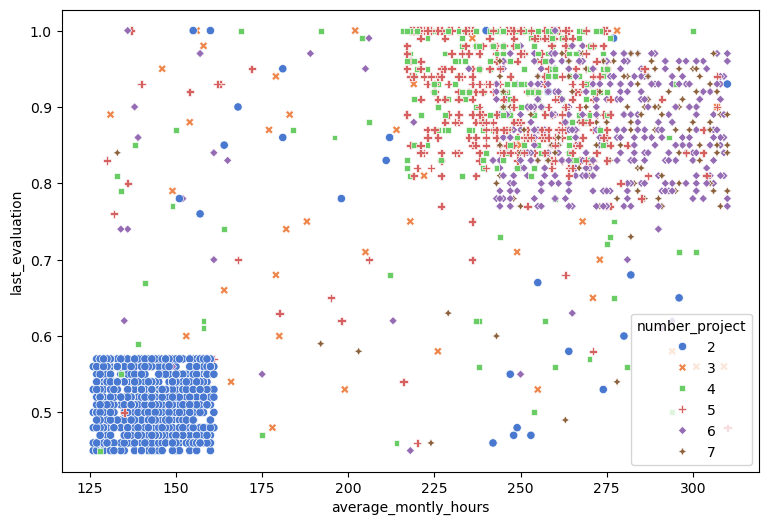

In [38]:
plt.figure(figsize=(9, 6))
sns.scatterplot(data = df_left, x = 'average_montly_hours', y = 'last_evaluation', 
               style = 'number_project', hue = 'number_project', palette='muted')

In [ ]:
# Satisfaction level and Evaluation was good for employees who left but the number of projects assigned to them was high

<Axes: xlabel='salary', ylabel='count'>

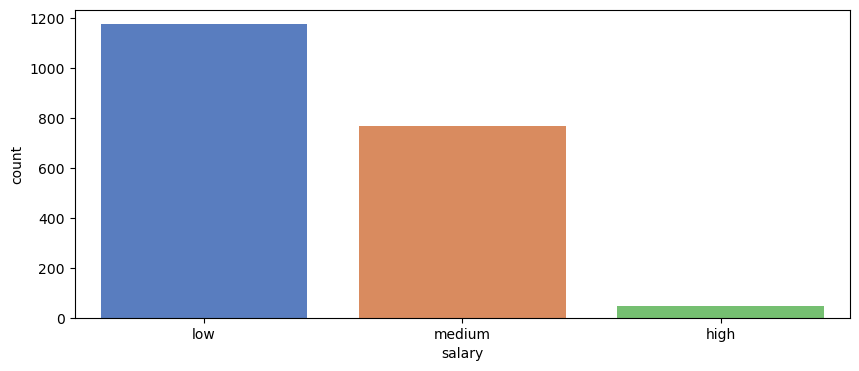

In [39]:
plt.figure(figsize=(10, 4))
sns.countplot(data = df_left, x = 'salary', hue = 'salary', palette='muted')

In [ ]:
# Most of the ppl who left had low salary bracket

<Axes: xlabel='time_spend_company', ylabel='count'>

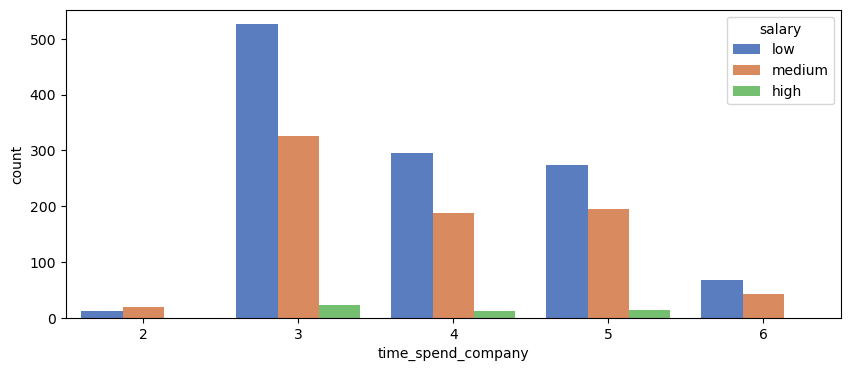

In [40]:
plt.figure(figsize=(10, 4))
sns.countplot(data = df_left, x = 'time_spend_company', hue = 'salary', palette='muted')

In [ ]:
# Even if the time spent in the company is significant, the employees with low & medium salary bracket have left the company

<Axes: xlabel='time_spend_company', ylabel='count'>

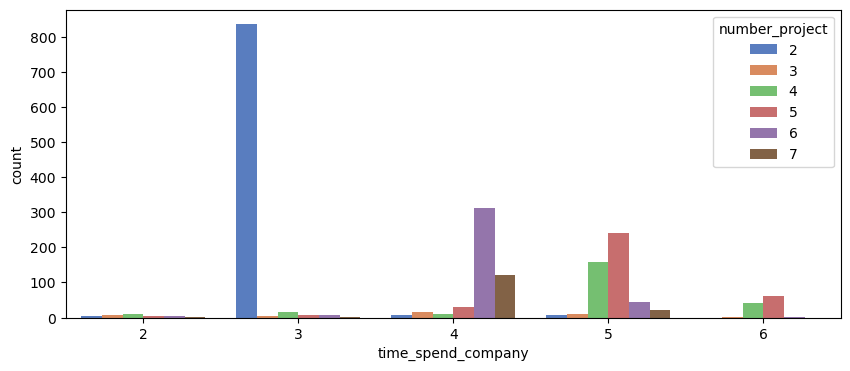

In [43]:
plt.figure(figsize=(10, 4))
sns.countplot(data = df_left, x = 'time_spend_company', hue = 'number_project', palette='muted')

<Axes: xlabel='time_spend_company', ylabel='number_project'>

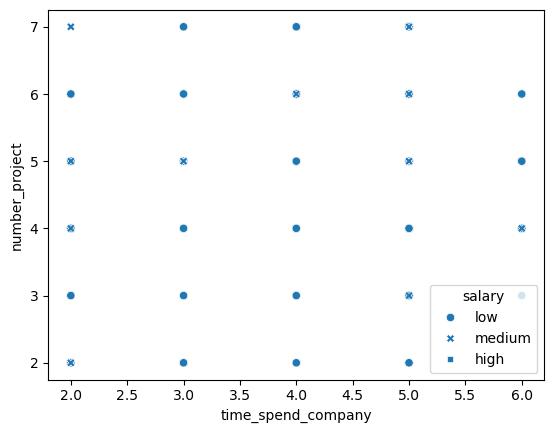

In [45]:
sns.scatterplot(data = df_left, x = 'time_spend_company', y = 'number_project', style = 'salary', palette='muted')

##### We can conclude from the above analysis that the 2 major factors for leaving the organization were -
##### 1. Work overload (too many projects assigned to the employee)
##### 2. Employees with low / medium salary 

In [ ]:
# Use label encoder to convert categorical columns to numbers 

In [48]:
categorical = [var for var in df.columns if df[var].dtype == 'O']
print(categorical)

['department', 'salary']


In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical:
    df[col] = le.fit_transform(df[col])

df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  department  \
0                   3              0     1                      0           6   
1                   6              0     1                      0           6   
2                   4              0     1                      0           6   
3                   5              0     1                      0           6   
4                   3              0     1                      0           6   

   salary  
0       1  
1       2  
2       2  
3       1  
4       1

In [ ]:
# Check for outliers...

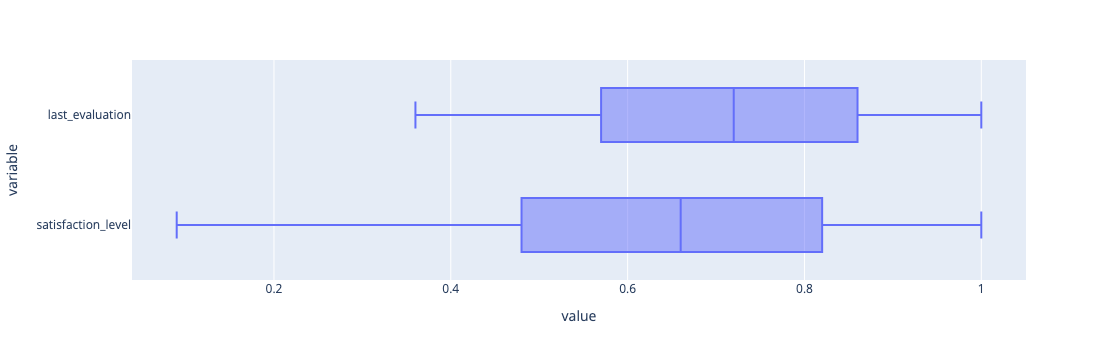

In [52]:
px.box(df, x = ['satisfaction_level', 'last_evaluation'])

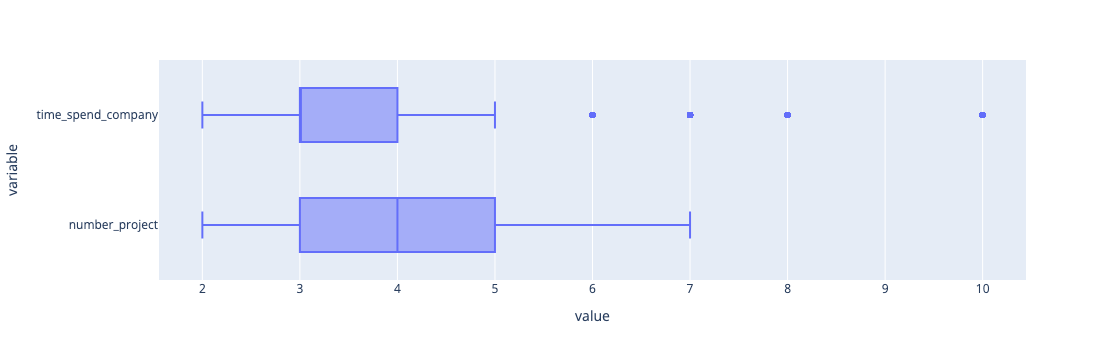

In [53]:
px.box(df, x = ['number_project', 'time_spend_company'])

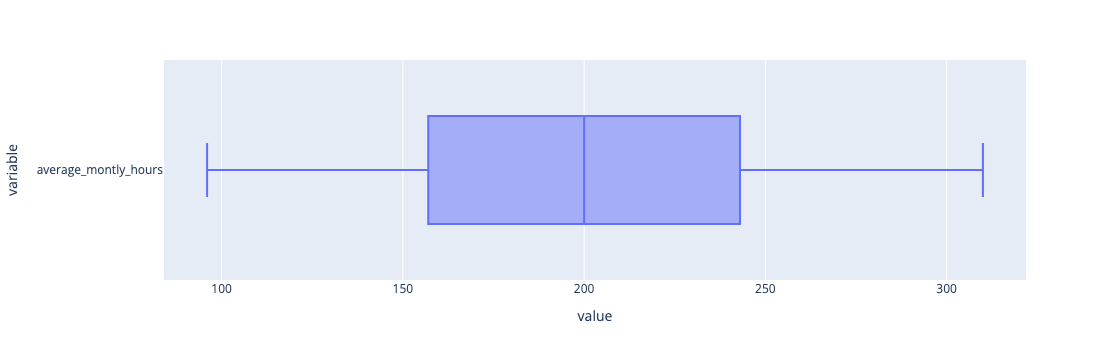

In [55]:
px.box(df, x = ['average_montly_hours'])

In [56]:
df[df['time_spend_company'] > 5]

satisfaction_level  last_evaluation  number_project  \
1                    0.80             0.86               5   
17                   0.78             0.99               4   
34                   0.84             0.87               4   
47                   0.57             0.70               3   
67                   0.90             0.98               4   
...                   ...              ...             ...   
11994                0.22             0.94               3   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   

       average_montly_hours  time_spend_company  Work_accident  left  \
1                       262                   6              0     1   
17                      255                   6              0     1   
34                      246                   6              0     1   
47                      273                   6              0     1   
67                      264                   6              0     1   
...                     ...                 ...            ...   ...   
11994                   193                  10              0     0   
11995                   259                  10              1     0   
11996                   266                  10              0     0   
11997                   185                  10              0     0   
11998                   172                  10              0     0   

       promotion_last_5years  department  salary  
1                          0           6       2  
17                         0           6       1  
34                         0           2       1  
47                         0           7       1  
67                         0           5       2  
...                      ...         ...     ...  
11994                      1           3       0  
11995                      1           3       0  
11996                      1           3       0  
11997                      1           3       0  
11998                      1           4       0  

[824 rows x 10 columns]

In [ ]:
# These employees have spent more than 5 years in the company

#### Split data into X and y

In [57]:
X = df.drop('left', axis = 1)
y = df.left

In [58]:
y.value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

#### Check if the data is biased... if yes.. use SMOTE technique

In [59]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [60]:
y.value_counts()

left
1    10000
0    10000
Name: count, dtype: int64

In [ ]:
#### Split the dataset in to train and test

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Build Classification Models...

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [67]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

train_score = np.round(model.score(X_train, y_train), 2)
test_score = np.round(model.score(X_test, y_test), 2)
cv_score = np.round(cross_val_score(model, X, y, cv = 5).mean(), 2)

print('Training score:',train_score )
print('Testing score:', test_score)
print('Cross Validation score:', cv_score)

Training score: 0.81
Testing score: 0.8
Cross Validation score: 0.81


In [72]:
# Decision Tree
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

train_score = np.round(clf.score(X_train, y_train), 2)
test_score = np.round(clf.score(X_test, y_test), 2)
cv_score = np.round(cross_val_score(clf, X, y, cv = 5).mean(), 2)

print('Training score:',train_score )
print('Testing score:', test_score)
print('Cross Validation score:', cv_score)

Training score: 1.0
Testing score: 0.95
Cross Validation score: 0.95


In [70]:
# Random Forest
from sklearn.model_selection import GridSearchCV
param = {
    'n_estimators' : range(2, 20),
    'criterion' : ['gini', 'entropy']
}
rf = RandomForestClassifier()
grid = GridSearchCV(estimator=rf, param_grid = param)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'n_estimators': 13}
0.9713499999999999


In [71]:
rclf = RandomForestClassifier(criterion='gini', n_estimators=13)
rclf.fit(X_train, y_train)

train_score = np.round(rclf.score(X_train, y_train), 2)
test_score = np.round(rclf.score(X_test, y_test), 2)
cv_score = np.round(cross_val_score(rclf, X, y, cv = 5).mean(), 2)

print('Training score:',train_score )
print('Testing score:', test_score)
print('Cross Validation score:', cv_score)

Training score: 1.0
Testing score: 0.97
Cross Validation score: 0.97


In [73]:
# KNN
train_scores = []
test_scores = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    sc = knn.score(X_train, y_train)
    train_scores.append(sc)
    sc = knn.score(X_test, y_test)
    test_scores.append(sc)

print(train_scores)
print(test_scores)

[1.0, 0.9898571428571429, 0.9668571428571429, 0.9667142857142857, 0.9547142857142857, 0.9549285714285715, 0.9467142857142857, 0.9465714285714286, 0.9412142857142857, 0.9417857142857143, 0.9362857142857143, 0.9370714285714286, 0.9310714285714285, 0.9324285714285714, 0.9268571428571428, 0.9277857142857143, 0.9236428571428571, 0.9253571428571429, 0.9212142857142858, 0.9232142857142858]
[0.9435, 0.9483333333333334, 0.9338333333333333, 0.9355, 0.9288333333333333, 0.9321666666666667, 0.9235, 0.9236666666666666, 0.9153333333333333, 0.9201666666666667, 0.9156666666666666, 0.9166666666666666, 0.9101666666666667, 0.9116666666666666, 0.9056666666666666, 0.9071666666666667, 0.9026666666666666, 0.9043333333333333, 0.899, 0.9015]


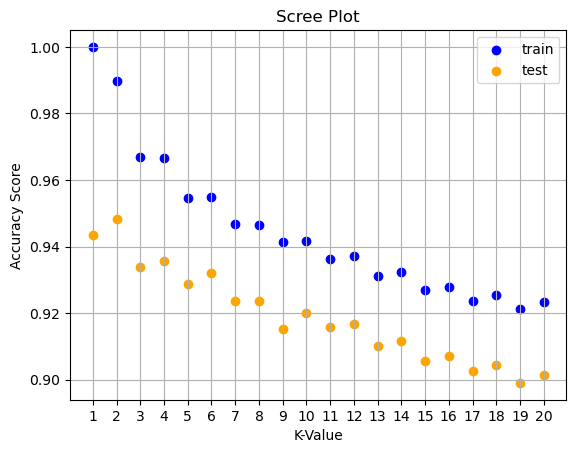

In [74]:
plt.scatter(range(1, 21), train_scores, marker='o', color = 'blue', label='train')
plt.scatter(range(1, 21), test_scores, marker='o', color = 'orange', label='test')
plt.xlabel('K-Value')
plt.ylabel('Accuracy Score')
plt.title('Scree Plot')
plt.xticks(range(1,21))
plt.legend()
plt.grid()
plt.show()

In [75]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

train_score = np.round(knn.score(X_train, y_train), 2)
test_score = np.round(knn.score(X_test, y_test), 2)
cv_score = np.round(cross_val_score(knn, X, y, cv = 5).mean(), 2)

print('Training score:',train_score )
print('Testing score:', test_score)
print('Cross Validation score:', cv_score)

Training score: 0.95
Testing score: 0.93
Cross Validation score: 0.94


In [ ]:
# We can use Random Forest Classifier for prediction new employees.

In [ ]:
# Reasons for leaving the company were :
# 1. Work load
# 2. Low Salary